In [1]:
from Modele import Modele
from Optimiseur import Optimiseur
from GenerateData import GenerateData
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_samples=50
n_features=3

np.random.seed(30)
Data= GenerateData(n_samples,n_features)
x,y = Data.make_classification()
 # Set the random seed for reproducibility
X_train, X_test, y_train, y_test = Data.split_data(x, y, test_size=0.3)

print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Training data shape:  (35, 3)
Test data shape:  (15, 3)


In [ ]:
modele = Modele(0)
optimiseur = Optimiseur(modele)

initializations = [np.random.randn(X_train.shape[0]) for _ in range(50)]
max_iters=10000
target=0.001
criterion='norm'
L,mu = modele.constante_L(X_train)

# Gradient Descent
gd_training_loss = []
gd_test_loss = []
gd_train_accuracies = []
gd_test_accuracies = []
gd_nb = max_iters
for init in initializations:
    alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(), 1/L, max_iters, target, criterion)
    gd_training_loss.append(modele.loss_function(X_train, y_train, alpha))
    gd_test_loss.append(modele.test_loss_function(X_train, X_test, y_test, alpha))
    gd_train_accuracies.append(modele.accuracy(X_train, X_train, y_train, alpha))
    gd_test_accuracies.append(modele.accuracy(X_train, X_test, y_test, alpha))
    if len(alpha_list) < gd_nb:
        gd_nb = len(alpha_list)

# Chebyshev
chebyshev_training_loss = []
chebyshev_test_loss = []
chebyshev_train_accuracies = []
chebyshev_test_accuracies = []
chebyshev_nb = max_iters
for init in initializations:
    alpha_chebyshev, alpha_list_chebyshev = optimiseur.Chebychev(X_train, y_train, init.copy(), 256, target, criterion)
    chebyshev_training_loss.append(modele.loss_function(X_train, y_train, alpha_chebyshev))
    chebyshev_test_loss.append(modele.test_loss_function(X_train, X_test, y_test, alpha_chebyshev))
    chebyshev_train_accuracies.append(modele.accuracy(X_train, X_train, y_train, alpha_chebyshev))
    chebyshev_test_accuracies.append(modele.accuracy(X_train, X_test, y_test, alpha_chebyshev))
    if len(alpha_list_chebyshev) < chebyshev_nb:
        chebyshev_nb = len(alpha_list_chebyshev)

# Mean of the results
mean_gd_training_loss = np.mean(gd_training_loss)
mean_gd_test_loss = np.mean(gd_test_loss)
mean_gd_train_accuracies = np.mean(gd_train_accuracies)
mean_gd_test_accuracies = np.mean(gd_test_accuracies)

mean_chebyshev_training_loss = np.mean(chebyshev_training_loss)
mean_chebyshev_test_loss = np.mean(chebyshev_test_loss)
mean_chebyshev_train_accuracies = np.mean(chebyshev_train_accuracies)
mean_chebyshev_test_accuracies = np.mean(chebyshev_test_accuracies)
# Dynamic Stepsize
dynamic_training_loss = []
dynamic_test_loss = []
dynamic_train_accuracies = []
dynamic_test_accuracies = []
dynamic_nb = max_iters
for init in initializations:
    alpha_dynamic, alpha_list_dynamic = optimiseur.dynamic_stepsize(X_train, y_train, init.copy(), max_iters, target, criterion)
    dynamic_training_loss.append(modele.loss_function(X_train, y_train, alpha_dynamic))
    dynamic_test_loss.append(modele.test_loss_function(X_train, X_test, y_test, alpha_dynamic))
    dynamic_train_accuracies.append(modele.accuracy(X_train, X_train, y_train, alpha_dynamic))
    dynamic_test_accuracies.append(modele.accuracy(X_train, X_test, y_test, alpha_dynamic))
    if len(alpha_list_dynamic) < dynamic_nb:
        dynamic_nb = len(alpha_list_dynamic)

# Mean of the results
mean_dynamic_training_loss = np.mean(dynamic_training_loss)
mean_dynamic_test_loss = np.mean(dynamic_test_loss)
mean_dynamic_train_accuracies = np.mean(dynamic_train_accuracies)
mean_dynamic_test_accuracies = np.mean(dynamic_test_accuracies)

# Print the results
print("Gradient Descent - Number of iterations: ", gd_nb)
print("Gradient Descent - Training Loss: ", mean_gd_training_loss)
print("Gradient Descent - Test Loss: ", mean_gd_test_loss)
print("Gradient Descent - Training Accuracy: ", mean_gd_train_accuracies)
print("Gradient Descent - Test Accuracy: ", mean_gd_test_accuracies,'\n')

print("Dynamic Stepsize - Number of iterations: ", dynamic_nb)
print("Dynamic Stepsize - Training Loss: ", mean_dynamic_training_loss)
print("Dynamic Stepsize - Test Loss: ", mean_dynamic_test_loss)
print("Dynamic Stepsize - Training Accuracy: ", mean_dynamic_train_accuracies)
print("Dynamic Stepsize - Test Accuracy: ", mean_dynamic_test_accuracies,'\n')

print("Chebyshev - Number of iterations: ", chebyshev_nb)
print("Chebyshev - Training Loss: ", mean_chebyshev_training_loss)
print("Chebyshev - Test Loss: ", mean_chebyshev_test_loss)
print("Chebyshev - Training Accuracy: ", mean_chebyshev_train_accuracies)
print("Chebyshev - Test Accuracy: ", mean_chebyshev_test_accuracies,'\n')


Gradient Descent - Number of iterations:  112
Gradient Descent - Training Loss:  0.222308541380089
Gradient Descent - Test Loss:  0.16787676160183396
Gradient Descent - Training Accuracy:  0.8857142857142858
Gradient Descent - Test Accuracy:  1.0 

Dynamic Stepsize - Number of iterations:  10000
Dynamic Stepsize - Training Loss:  0.22230947585103158
Dynamic Stepsize - Test Loss:  0.16787944249983205
Dynamic Stepsize - Training Accuracy:  0.8857142857142858
Dynamic Stepsize - Test Accuracy:  1.0 

Chebyshev - Number of iterations:  98
Chebyshev - Training Loss:  0.22230853962356253
Chebyshev - Test Loss:  0.16787820224555106
Chebyshev - Training Accuracy:  0.8857142857142858
Chebyshev - Test Accuracy:  1.0 



0.0013403478466315175
Comparaison of 1/L and 1.9/L


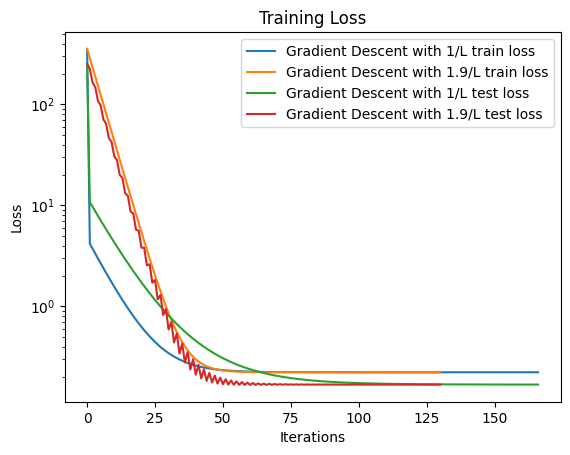

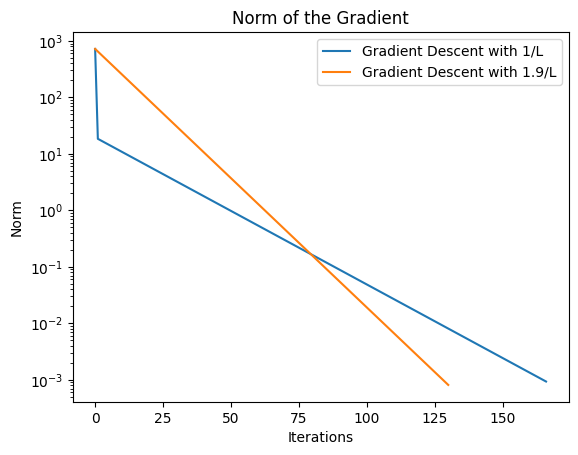

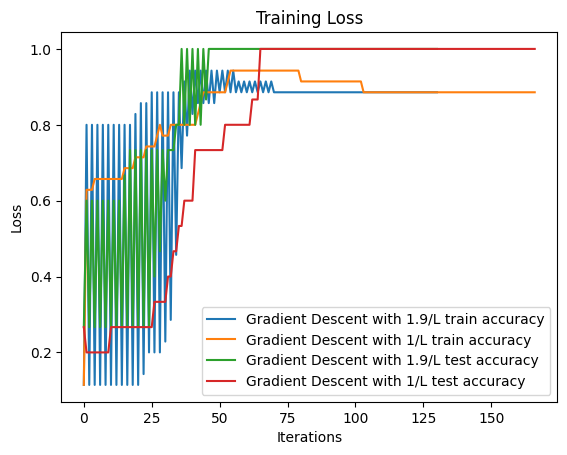

Comparaison of Gradient Descent and Chebyshev


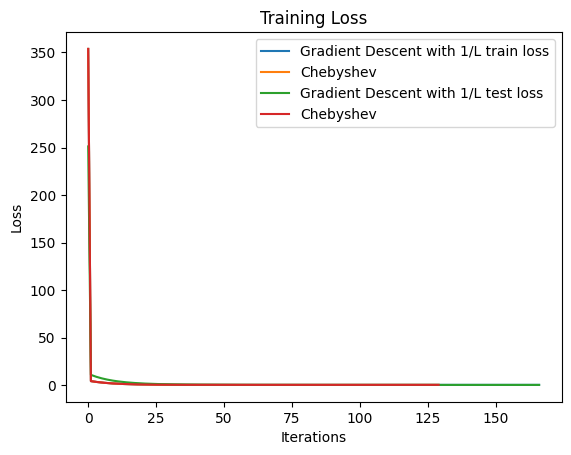

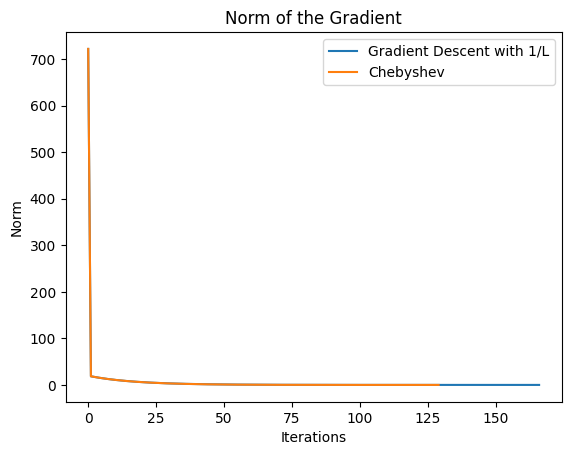

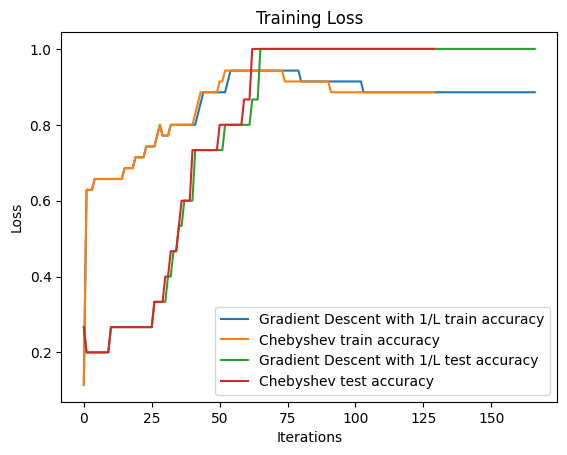

Comparaison of Gradient Descent and Dynamic Stepsize


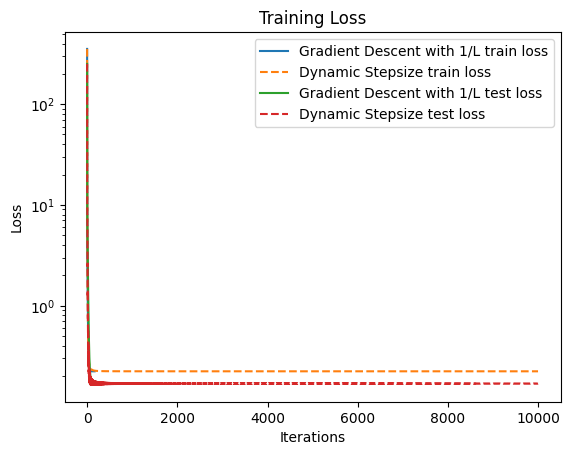

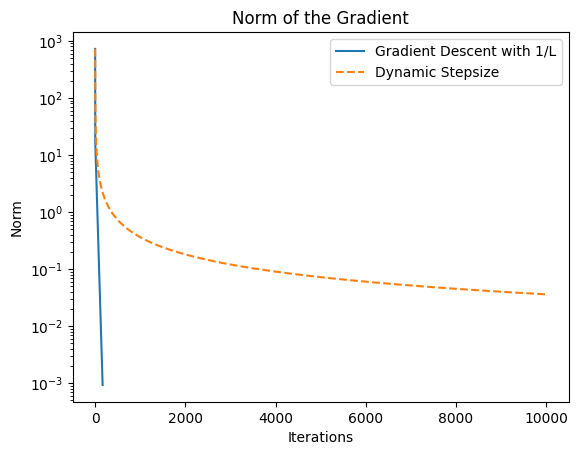

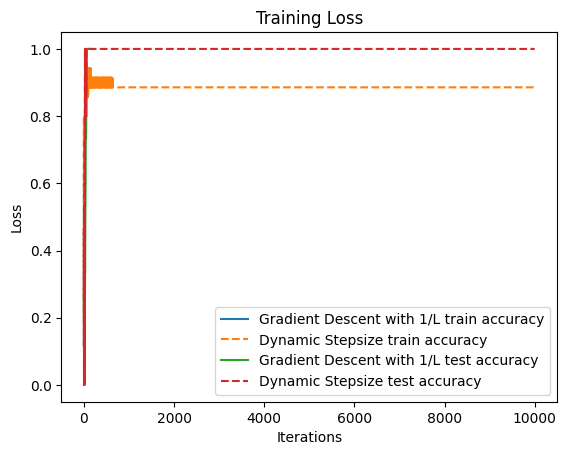

In [4]:
modele = Modele(0)
optimiseur = Optimiseur(modele)
L,mu = modele.constante_L(X_train)
print(1/L) 

init = np.random.randn(X_train.shape[0])
max_iters=10000
target=0.001
criterion='norm'

# Gradient Descent
alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(), 1/L, max_iters, target, criterion)
gd_training_loss=[modele.loss_function(X_train, y_train, alpha) for alpha in alpha_list]
gd_test_loss=[modele.test_loss_function(X_train, X_test, y_test, alpha)for alpha in alpha_list]
gd_train_accuracies=[modele.accuracy(X_train, X_train, y_train, alpha)for alpha in alpha_list]
gd_test_accuracies=[modele.accuracy(X_train, X_test, y_test, alpha)for alpha in alpha_list]
gd_norm = [np.linalg.norm(modele.gradient(X_train, y_train, alpha)) for alpha in alpha_list]

# Gradient Descent
alpha_, alpha_list_ = optimiseur.gradient_descent(X_train, y_train, init.copy(), 1.9/L, max_iters, target, criterion)
gd_training_loss_=[modele.loss_function(X_train, y_train, alpha) for alpha in alpha_list_]
gd_test_loss_=[modele.test_loss_function(X_train, X_test, y_test, alpha)for alpha in alpha_list_]
gd_train_accuracies_=[modele.accuracy(X_train, X_train, y_train, alpha)for alpha in alpha_list_]
gd_test_accuracies_=[modele.accuracy(X_train, X_test, y_test, alpha)for alpha in alpha_list_]
gd_norm_ = [np.linalg.norm(modele.gradient(X_train, y_train, alpha)) for alpha in alpha_list_]

# Chebyshev
alpha_chebyshev, alpha_list_chebyshev = optimiseur.Chebychev(X_train, y_train, init.copy(), 256, target, criterion)
chebyshev_training_loss=[modele.loss_function(X_train, y_train, alpha_chebyshev) for alpha_chebyshev in alpha_list_chebyshev]
chebyshev_test_loss=[modele.test_loss_function(X_train, X_test, y_test, alpha_chebyshev)for alpha_chebyshev in alpha_list_chebyshev]
chebyshev_train_accuracies=[modele.accuracy(X_train, X_train, y_train, alpha_chebyshev)for alpha_chebyshev in alpha_list_chebyshev]
chebyshev_test_accuracies=[modele.accuracy(X_train, X_test, y_test, alpha_chebyshev)for alpha_chebyshev in alpha_list_chebyshev]
chebyshev_norm = [np.linalg.norm(modele.gradient(X_train, y_train, alpha_chebyshev)) for alpha_chebyshev in alpha_list_chebyshev]

# Dynamic Stepsize
alpha_dynamic, alpha_list_dynamic = optimiseur.dynamic_stepsize(X_train, y_train, init.copy(), max_iters, target, criterion)
dynamic_training_loss=[modele.loss_function(X_train, y_train, alpha_dynamic) for alpha_dynamic in alpha_list_dynamic]
dynamic_test_loss=[modele.test_loss_function(X_train, X_test, y_test, alpha_dynamic)for alpha_dynamic in alpha_list_dynamic]
dynamic_train_accuracies=[modele.accuracy(X_train, X_train, y_train, alpha_dynamic)for alpha_dynamic in alpha_list_dynamic]
dynamic_test_accuracies=[modele.accuracy(X_train, X_test, y_test, alpha_dynamic)for alpha_dynamic in alpha_list_dynamic]
dynamic_norm = [np.linalg.norm(modele.gradient(X_train, y_train, alpha_dynamic)) for alpha_dynamic in alpha_list_dynamic] 

print("Comparaison of 1/L and 1.9/L")
plt.figure()
plt.plot(gd_training_loss, label='Gradient Descent with 1/L train loss')
plt.plot(gd_training_loss_, label='Gradient Descent with 1.9/L train loss')
plt.plot(gd_test_loss, label='Gradient Descent with 1/L test loss')
plt.plot(gd_test_loss_, label='Gradient Descent with 1.9/L test loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Training Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(gd_norm, label='Gradient Descent with 1/L')
plt.plot(gd_norm_, label='Gradient Descent with 1.9/L')
plt.xlabel('Iterations')
plt.ylabel('Norm')
plt.yscale('log')
plt.title('Norm of the Gradient')
plt.legend()
plt.show()

plt.figure()
plt.plot(gd_train_accuracies_, label='Gradient Descent with 1.9/L train accuracy')
plt.plot(gd_train_accuracies, label='Gradient Descent with 1/L train accuracy')
plt.plot(gd_test_accuracies_, label='Gradient Descent with 1.9/L test accuracy')
plt.plot(gd_test_accuracies, label='Gradient Descent with 1/L test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

print("Comparaison of Gradient Descent and Chebyshev")
plt.figure()
plt.plot(gd_training_loss, label='Gradient Descent with 1/L train loss')
plt.plot(chebyshev_training_loss, label='Chebyshev')
plt.plot(gd_test_loss, label='Gradient Descent with 1/L test loss')
plt.plot(chebyshev_training_loss, label='Chebyshev')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(gd_norm, label='Gradient Descent with 1/L')
plt.plot(chebyshev_norm, label='Chebyshev')
plt.xlabel('Iterations')
plt.ylabel('Norm')
plt.title('Norm of the Gradient')
plt.legend()
plt.show()

plt.figure()
plt.plot(gd_train_accuracies, label='Gradient Descent with 1/L train accuracy')
plt.plot(chebyshev_train_accuracies, label='Chebyshev train accuracy')
plt.plot(gd_test_accuracies, label='Gradient Descent with 1/L test accuracy')
plt.plot(chebyshev_test_accuracies, label='Chebyshev test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

print("Comparaison of Gradient Descent and Dynamic Stepsize")
plt.figure()
plt.plot(gd_training_loss, label='Gradient Descent with 1/L train loss')
plt.plot(dynamic_training_loss, linestyle='--',label='Dynamic Stepsize train loss')
plt.plot(gd_test_loss, label='Gradient Descent with 1/L test loss')
plt.plot(dynamic_test_loss,linestyle='--', label='Dynamic Stepsize test loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Training Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(gd_norm, label='Gradient Descent with 1/L')
plt.plot(dynamic_norm,linestyle='--', label='Dynamic Stepsize')
plt.xlabel('Iterations')
plt.ylabel('Norm')
plt.yscale('log')
plt.title('Norm of the Gradient')
plt.legend()
plt.show()

plt.figure()
plt.plot(gd_train_accuracies, label='Gradient Descent with 1/L train accuracy')
plt.plot(dynamic_train_accuracies,linestyle='--', label='Dynamic Stepsize train accuracy')
plt.plot(gd_test_accuracies, label='Gradient Descent with 1/L test accuracy')
plt.plot(dynamic_test_accuracies,linestyle='--', label='Dynamic Stepsize test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


Gradient Descent - Number of iterations:  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 11, 11, 11, 12, 12, 13, 14, 15, 15, 15, 16, 18]
12.87767737603458


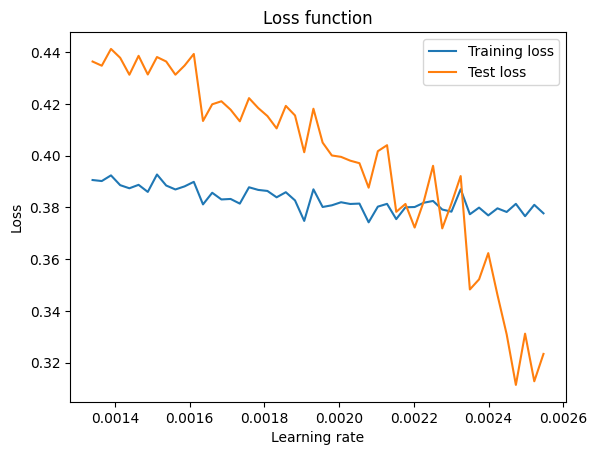

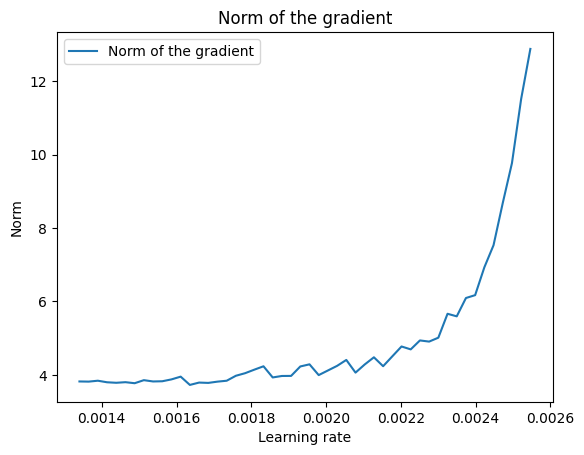

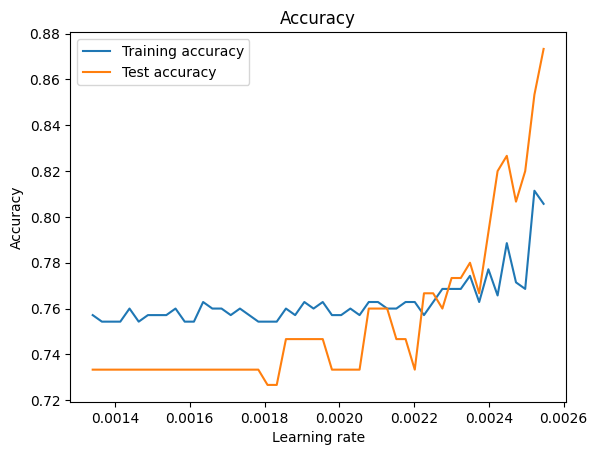

In [5]:
modele = Modele(0)
optimiseur = Optimiseur(modele)

initializations = [np.random.randn(X_train.shape[0]) for _ in range(10)]
max_iters=1000000
target=0.4
criterion='loss'
L,mu = modele.constante_L(X_train)

learning_rates = np.linspace(1/L,1.9/L,50)
training_loss = []
test_loss = []
norms = []
train_accuracies = []
test_accuracies = []
nb = []
for lr in learning_rates:
    gd_training_loss = []
    gd_test_loss = []
    gd_norms =[]
    gd_train_accuracies = []
    gd_test_accuracies = []
    gd_nb = max_iters
    for init in initializations:
        alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(), lr, max_iters, target, criterion)
        gd_training_loss.append(modele.loss_function(X_train, y_train, alpha))
        gd_test_loss.append(modele.test_loss_function(X_train, X_test, y_test, alpha))
        gd_norms.append(np.linalg.norm(modele.gradient(X_train, y_train, alpha)))
        gd_train_accuracies.append(modele.accuracy(X_train, X_train, y_train, alpha))
        gd_test_accuracies.append(modele.accuracy(X_train, X_test, y_test, alpha))
        if len(alpha_list) < gd_nb:
            gd_nb = len(alpha_list)
    # Mean of the results
    mean_gd_training_loss = np.mean(gd_training_loss)
    mean_gd_test_loss = np.mean(gd_test_loss)
    mean_gd_norms = np.mean(gd_norms)
    mean_gd_train_accuracies = np.mean(gd_train_accuracies)
    mean_gd_test_accuracies = np.mean(gd_test_accuracies)

    training_loss.append(mean_gd_training_loss)
    test_loss.append(mean_gd_test_loss)
    norms.append(mean_gd_norms)
    train_accuracies.append(mean_gd_train_accuracies)
    test_accuracies.append(mean_gd_test_accuracies)
    nb.append(gd_nb)

print("Gradient Descent - Number of iterations: ", nb)
print(mean_gd_norms)

plt.figure()
plt.plot(learning_rates,training_loss, label='Training loss')
plt.plot(learning_rates,test_loss, label='Test loss')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Loss function')
plt.legend()
plt.show()

plt.figure()
plt.plot(learning_rates,norms, label='Norm of the gradient')
plt.xlabel('Learning rate')
plt.ylabel('Norm')
plt.title('Norm of the gradient')
plt.legend()
plt.show()

plt.figure()
plt.plot(learning_rates,train_accuracies, label='Training accuracy')
plt.plot(learning_rates,test_accuracies, label='Test accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()



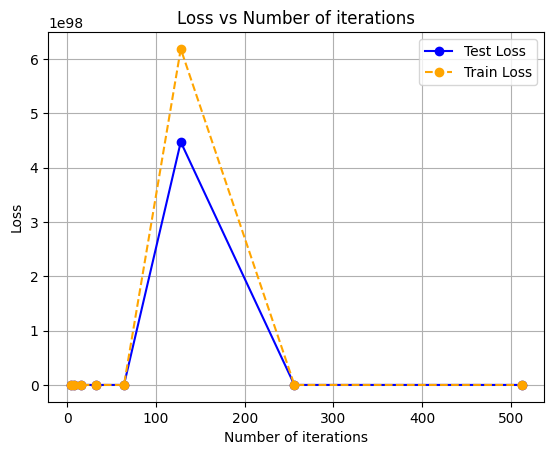

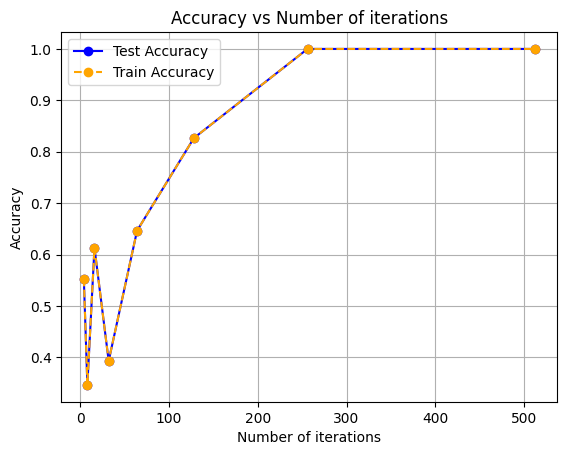

In [8]:
modele = Modele(0)
optimiseur = Optimiseur(modele)

initializations = [np.random.randn(X_train.shape[0]) for _ in range(10)]
max_iters=100000
target=0.001
criterion='norm'
L,mu = modele.constante_L(X_train)

train_accuracies = []
test_accuracies = []
train_loss= []
test_loss = []

for n_iter in [4,8,16,32,64,128,256,512]:
    train_accuracies_fractal_ = []
    test_accuracies_fractal_ = []
    train_loss_fractal_ = []
    test_loss_fractal_ = []

    for init in initializations:

        alpha_long_step, alpha_values_long_step = optimiseur.Chebychev(X_train, y_train, init.copy(), n_iter, target,criterion)
        train_accuracies_fractal_.append(modele.accuracy(X_train, X_test, y_test, alpha_long_step))
        test_accuracies_fractal_.append(modele.accuracy(X_train, X_test, y_test, alpha_long_step))
        train_loss_fractal_.append(modele.loss_function(X_train, y_train, alpha_long_step))
        test_loss_fractal_.append(modele.test_loss_function(X_train, X_test, y_test, alpha_long_step))


    train_accuracies.append(np.mean(train_accuracies_fractal_))
    test_accuracies.append(np.mean(test_accuracies_fractal_))
    train_loss.append(np.mean(train_loss_fractal_))
    test_loss.append(np.mean(test_loss_fractal_))


plt.figure()
plt.plot([4,8,16,32,64,128,256,512], test_loss, marker='o', linestyle='-',label = 'Test Loss',color='blue')
plt.plot([4,8,16,32,64,128,256,512], train_loss, marker='o', linestyle='--', label='Train Loss',color='orange')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss vs Number of iterations') 
plt.grid(True)
plt.show()

plt.figure()
plt.plot([4,8,16,32,64,128,256,512], test_accuracies, marker='o', linestyle='-', label='Test Accuracy',color='blue')
plt.plot([4,8,16,32,64,128,256,512], train_accuracies, marker='o', linestyle='--', label='Train Accuracy',color='orange')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of iterations')
plt.grid(True)
plt.show()


In [11]:
# Load the dataset
data = np.load('ckn_mnist.npz')

# Access the arrays in the dataset
images = data['X']
labels = data['y']
# Binarization of the labels
labels = np.where(labels < 5, -1, 1)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

n=50
x_values = np.random.randint(0, images.shape[0] - n, size=10)
x=x_values[0]
# Take only n images for training
images = images[x:x+n]
labels = labels[x:x+n]
# Separet the dataset into training and testing
n_train = int(n*0.8)
train_images = images[:n_train]
train_labels = labels[:n_train]
test_images = images[n_train:]
test_labels = labels[n_train:]

# Reshape the images to 2D
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)
y_train = train_labels.reshape(-1)
y_test = test_labels.reshape(-1)

print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Images shape: (60000, 2304)
Labels shape: (60000, 1)
Training data shape:  (40, 2304)
Test data shape:  (10, 2304)


11.909859973858394
Gradient Descent - Number of iterations:  [10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


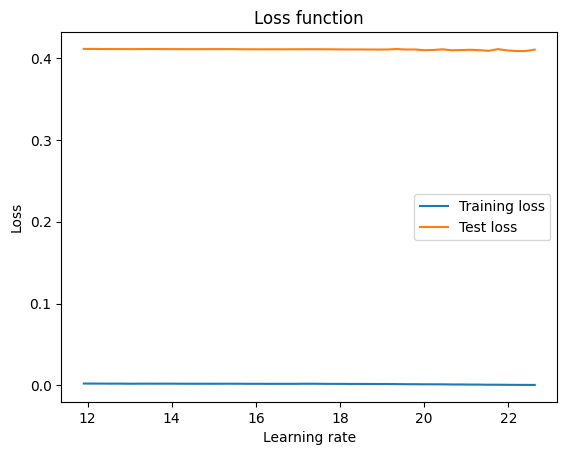

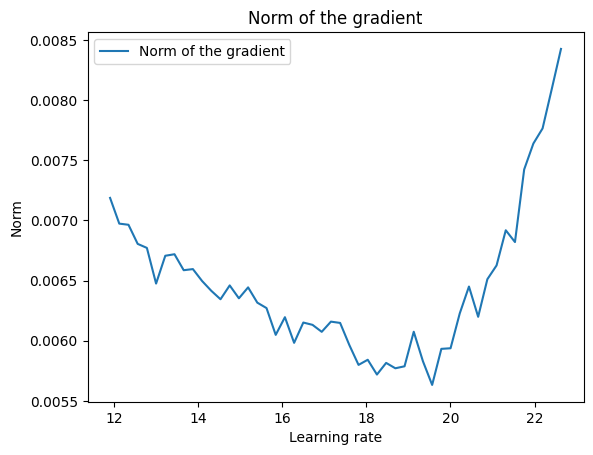

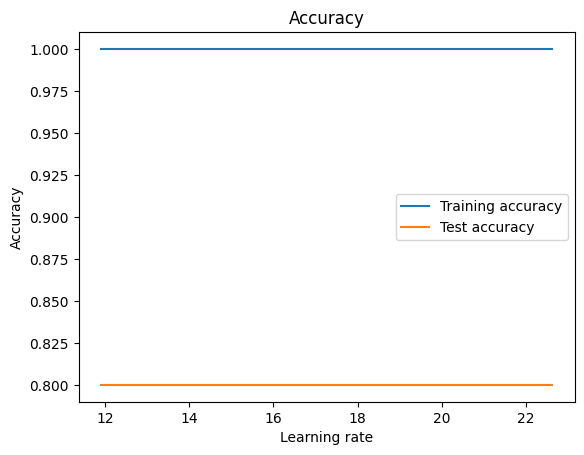

In [15]:
modele = Modele(0)
optimiseur = Optimiseur(modele)

initializations = [np.random.randn(X_train.shape[0]) for _ in range(10)]
max_iters=1000
target=0.01
criterion='norm'
L,mu = modele.constante_L(X_train)
print(1/L)


learning_rates = np.linspace(1/L,1.9/L,50)
training_loss = []
test_loss = []
norms = []
train_accuracies = []
test_accuracies = []
nb = []
for lr in learning_rates: 
    gd_training_loss = []
    gd_test_loss = []
    gd_norms =[]
    gd_train_accuracies = []
    gd_test_accuracies = []
    gd_nb = max_iters
    for init in initializations:
        alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(), lr, max_iters, target, criterion)
        gd_training_loss.append(modele.loss_function(X_train, y_train, alpha))
        gd_test_loss.append(modele.test_loss_function(X_train, X_test, y_test, alpha))
        gd_norms.append(np.linalg.norm(modele.gradient(X_train, y_train, alpha)))
        gd_train_accuracies.append(modele.accuracy(X_train, X_train, y_train, alpha))
        gd_test_accuracies.append(modele.accuracy(X_train, X_test, y_test, alpha))
        if len(alpha_list) < gd_nb:
            gd_nb = len(alpha_list)
    # Mean of the results
    mean_gd_training_loss = np.mean(gd_training_loss)
    mean_gd_test_loss = np.mean(gd_test_loss)
    mean_gd_norms = np.mean(gd_norms)
    mean_gd_train_accuracies = np.mean(gd_train_accuracies)
    mean_gd_test_accuracies = np.mean(gd_test_accuracies)

    training_loss.append(mean_gd_training_loss)
    test_loss.append(mean_gd_test_loss)
    norms.append(mean_gd_norms)
    train_accuracies.append(mean_gd_train_accuracies)
    test_accuracies.append(mean_gd_test_accuracies)
    nb.append(gd_nb)

print("Gradient Descent - Number of iterations: ", nb)

plt.figure()
plt.plot(learning_rates,training_loss, label='Training loss')
plt.plot(learning_rates,test_loss, label='Test loss')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Loss function')
plt.legend()
plt.show()

plt.figure()
plt.plot(learning_rates,norms, label='Norm of the gradient')
plt.xlabel('Learning rate')
plt.ylabel('Norm')
plt.title('Norm of the gradient')
plt.legend()
plt.show()

plt.figure()
plt.plot(learning_rates,train_accuracies, label='Training accuracy')
plt.plot(learning_rates,test_accuracies, label='Test accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()



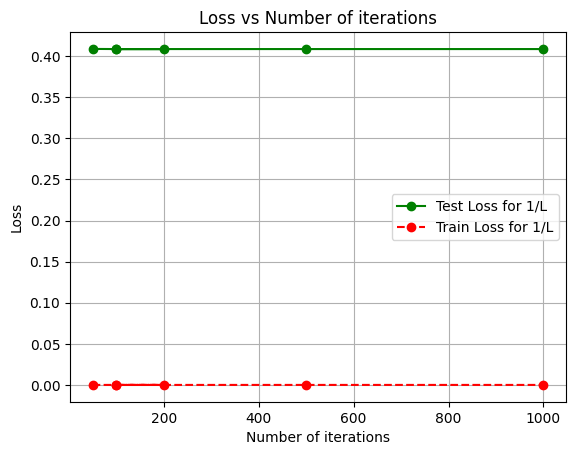

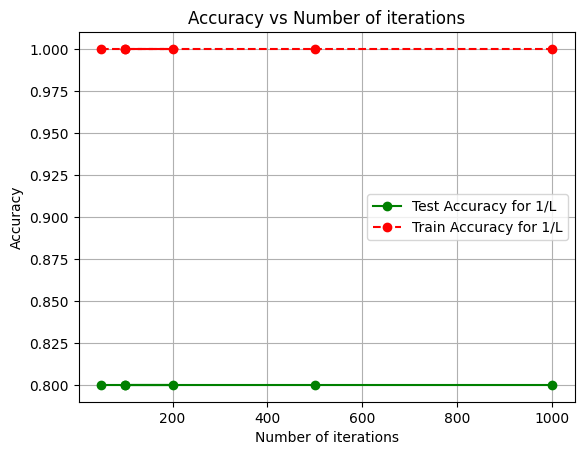

In [16]:
modele = Modele(0)
optimiseur = Optimiseur(modele)

initializations = [np.random.randn(X_train.shape[0]) for _ in range(10)]
target=0.00001
criterion='norm'
L,mu = modele.constante_L(X_train)

nb_iterations = [50,100,200,100,500,1000]
train_accuracies_ = []
test_accuracies_ = []
train_loss_= []
test_loss_ = []

for nb in nb_iterations:
    train_acc =[]
    test_acc=[]
    train_l=[]
    test_l=[]

    for init in initializations:
        alpha_long_step, alpha_values_long_step = optimiseur.gradient_descent(X_train, y_train, init.copy(), 1/L, nb, target,criterion)
        train_acc.append(modele.accuracy(X_train, X_train, y_train, alpha_long_step))
        test_acc.append(modele.accuracy(X_train, X_test, y_test, alpha_long_step))
        train_l.append(modele.loss_function(X_train, y_train, alpha_long_step))
        test_l.append(modele.test_loss_function(X_train, X_test, y_test, alpha_long_step))

    train_accuracies_.append(np.mean(train_acc))
    test_accuracies_.append(np.mean(test_acc))
    train_loss_.append(np.mean(train_l))
    test_loss_.append(np.mean(test_l))

plt.figure()
plt.plot(nb_iterations, test_loss_, marker='o', linestyle='-',label = 'Test Loss for 1/L',color='green')
plt.plot(nb_iterations, train_loss_, marker='o', linestyle='--', label='Train Loss for 1/L',color='red')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss vs Number of iterations') 
plt.grid(True)
plt.show()

plt.figure()
plt.plot(nb_iterations, test_accuracies_, marker='o', linestyle='-', label='Test Accuracy for 1/L',color='green')
plt.plot(nb_iterations, train_accuracies_, marker='o', linestyle='--', label='Train Accuracy for 1/L',color='red')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of iterations')
plt.grid(True)
plt.show()
